### New Analysis and Mapping for Oakland's 2019 Race Data ###

**Background**

All the way back in Week 3, we created maps for Oakland's racial and income data to use as our equity lenses in our pothole analysis. Those demographic maps were created based on census tracts, but our group has sense decided to base our analysis around census block groups given the relatively small size of the City of Oakland. One of our next steps from the midterm project was to create datasets of block groups that fit certain demographic profiles and then map our pothole distroubtion and time to close data onto those census block datasets of different demographic profiles (for example, a dataset of just Oakland census blocks with a black population above 30% or in the top quartile of incomes). This notebook attempts to create the datasets for that analysis and standardize our demograhphic analysis to census blocks in a single clean notebook. 

**Sources, Libraries, Data Import**

The data used in this notebook was pulled from the censusreporter [website](https://censusreporter.org/data/table/?table=B03002&geo_ids=16000US0653000,150|16000US0653000&primary_geo_id=16000US0653000#). The data is from the 2019 American Community Survey. It was downloaded as a geojson file. 

We will use the panda/geopanda, madplotlib, and concextily libraries for this analysis. 

In [2]:
import pandas as pd

import geopandas as gpd
 
import contextily as ctx

import matplotlib.pyplot as plt

In [4]:
rdf = gpd.read_file('Data/ACS2019RaceData.geojson')

In [5]:
# Info command to what's in our dataset
rdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             338 non-null    object  
 1   name              338 non-null    object  
 2   B03002001         338 non-null    float64 
 3   B03002001, Error  338 non-null    float64 
 4   B03002002         338 non-null    float64 
 5   B03002002, Error  338 non-null    float64 
 6   B03002003         338 non-null    float64 
 7   B03002003, Error  338 non-null    float64 
 8   B03002004         338 non-null    float64 
 9   B03002004, Error  338 non-null    float64 
 10  B03002005         338 non-null    float64 
 11  B03002005, Error  338 non-null    float64 
 12  B03002006         338 non-null    float64 
 13  B03002006, Error  338 non-null    float64 
 14  B03002007         338 non-null    float64 
 15  B03002007, Error  338 non-null    float64 
 16  B03002008         

In [6]:
# Let's see what that looks like in a table
rdf.head(3)

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,15000US060014001001,"Block Group 1, Alameda, CA",3120.0,208.0,3002.0,191.0,2317.0,235.0,107.0,68.0,...,12.0,34.0,33.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,15000US060014002001,"Block Group 1, Alameda, CA",990.0,138.0,894.0,129.0,761.0,129.0,13.0,13.0,...,12.0,5.0,7.0,23.0,25.0,0.0,12.0,23.0,25.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
2,15000US060014002002,"Block Group 2, Alameda, CA",1017.0,123.0,939.0,129.0,714.0,116.0,39.0,46.0,...,12.0,12.0,14.0,32.0,34.0,14.0,25.0,18.0,25.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."


**Data Cleanup**

So this dataset comes with a lot of unwanted error columns and extra demographic information. Using a metadatafile included in the download, our next steps will be to:

* Only include the columns we want for our analysis. 
* Re-name the columns to their appropriate racial category.
* Create % columns for each racial category to normalize our data. 

In [7]:
# Based on the metadatafile.
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [8]:
#Refine our dataset
rdf = rdf[columns_to_keep]

In [9]:
#Rename these columns to the racial group they represent. 
rdf.columns = ['geoid',
 'name',
 'Total',
 'White alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some other race alone',
 'Two or more races',
 'Hispanic or Latino',
 'geometry']

In [10]:
# Adding percentage columns
rdf['Percent White alone'] = rdf['White alone']/rdf['Total']*100
rdf['Percent Black or African American alone'] = rdf['Black or African American alone']/rdf['Total']*100
rdf['Percent American Indian and Alaska Native alone'] = rdf['American Indian and Alaska Native alone']/rdf['Total']*100
rdf['Percent Asian alone'] = rdf['Asian alone']/rdf['Total']*100
rdf['Percent Native Hawaiian and Other Pacific Islander alone'] = rdf['Native Hawaiian and Other Pacific Islander alone']/rdf['Total']*100
rdf['Percent Some other race alone'] = rdf['Some other race alone']/rdf['Total']*100
rdf['Percent Two or more races'] = rdf['Two or more races']/rdf['Total']*100
rdf['Percent Hispanic or Latino'] = rdf['Hispanic or Latino']/rdf['Total']*100

In [11]:
# Now let's check for census blocks with little to no population
rdf_sorted = rdf.sort_values(by='Total',ascending = True)
rdf_sorted.head(8)

,geoid,name,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,geometry,Percent White alone,Percent Black or African American alone,Percent American Indian and Alaska Native alone,Percent Asian alone,Percent Native Hawaiian and Other Pacific Islander alone,Percent Some other race alone,Percent Two or more races,Percent Hispanic or Latino
320,15000US060014100003,"Block Group 3, Alameda, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-122.15170 37.75191, -122.1516...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,15000US060019900000,"Block Group 0, Alameda, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-122.09859 37.49488, -122.0910...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,15000US060014090002,"Block Group 2, Alameda, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-122.22655 37.74684, -122.2265...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,15000US060014090004,"Block Group 4, Alameda, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-122.25550 37.72177, -122.2515...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,15000US060019819001,"Block Group 1, Alameda, CA",58.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,"MULTIPOLYGON (((-122.34668 37.81103, -122.3441...",86.206897,0.000000,0.000000,0.000000,0.0,0.0,0.000000,13.793103
334,15000US060019820001,"Block Group 1, Alameda, CA",63.0,10.0,23.0,2.0,20.0,0.0,0.0,0.0,8.0,"MULTIPOLYGON (((-122.31439 37.79484, -122.3135...",15.873016,36.507937,3.174603,31.746032,0.0,0.0,0.000000,12.698413
50,15000US060014017003,"Block Group 3, Alameda, CA",85.0,17.0,33.0,0.0,0.0,0.0,0.0,0.0,35.0,"MULTIPOLYGON (((-122.34668 37.81103, -122.3409...",20.000000,38.823529,0.000000,0.000000,0.0,0.0,0.000000,41.176471
170,15000US060014061002,"Block Group 2, Alameda, CA",369.0,26.0,59.0,0.0,87.0,0.0,0.0,1.0,196.0,"MULTIPOLYGON (((-122.23020 37.76898, -122.2298...",7.046070,15.989160,0.000000,23.577236,0.0,0.0,0.271003,53.116531


In [12]:
# Let's get rid of the census block groups with less than 100 people
rdf = rdf[rdf['Total']>100]

In [13]:
#Let's check for a total row.
rdf.tail(2)

,geoid,name,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,geometry,Percent White alone,Percent Black or African American alone,Percent American Indian and Alaska Native alone,Percent Asian alone,Percent Native Hawaiian and Other Pacific Islander alone,Percent Some other race alone,Percent Two or more races,Percent Hispanic or Latino
335,15000US060019832001,"Block Group 1, Alameda, CA",583.0,308.0,53.0,9.0,138.0,3.0,5.0,20.0,47.0,"MULTIPOLYGON (((-122.28417 37.79402, -122.2838...",52.830189,9.090909,1.543739,23.670669,0.514580,0.857633,3.430532,8.061750
337,16000US0653000,"Oakland, CA",425097.0,120225.0,98749.0,1455.0,65195.0,2237.0,1812.0,20482.0,114942.0,"MULTIPOLYGON (((-122.35588 37.83573, -122.3507...",28.281780,23.229757,0.342275,15.336500,0.526233,0.426256,4.818194,27.039005


In [14]:
# Let's get rid of that total row. 
rdf = rdf.drop(337)

**Mapping**

Now that the data has been cleaned up, we can proceed to the mapping! I'm going to use a function and loop to create a series of maps showing the distrobution of census blocks according to each racial group.

In [15]:
# Basemaps are usually a good idea, so I'm going to project to meracator so we can add one. 
rdf_web_mercator = rdf.to_crs(epsg=3857)

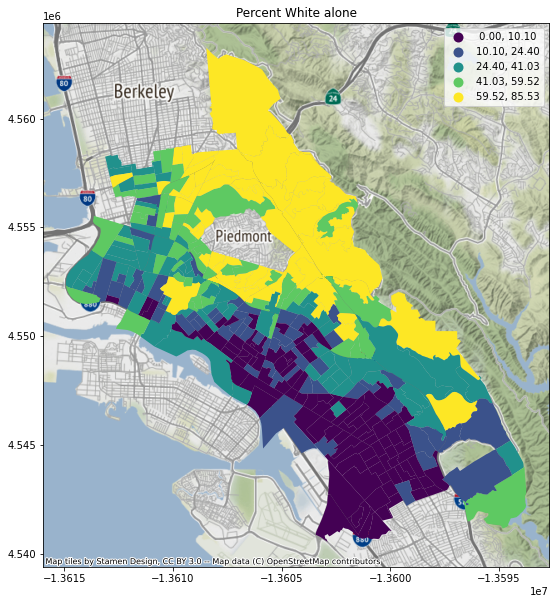

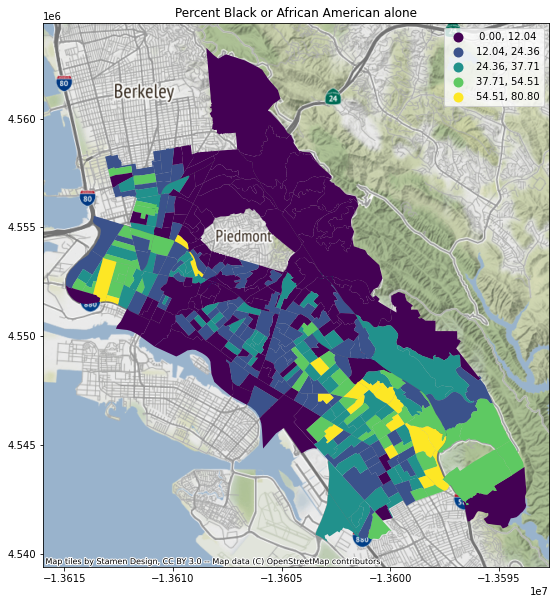

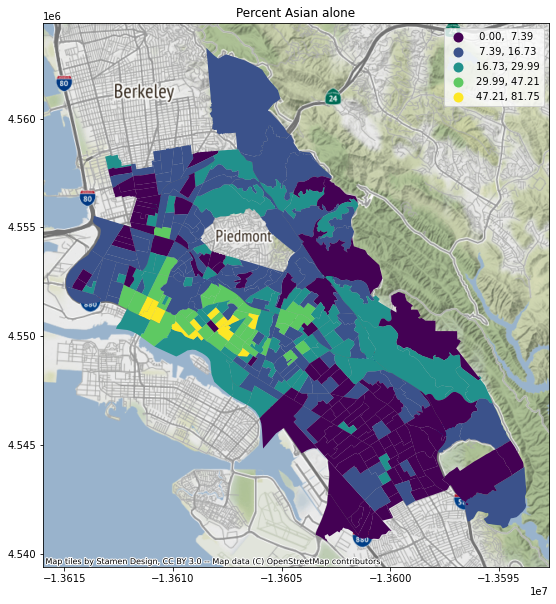

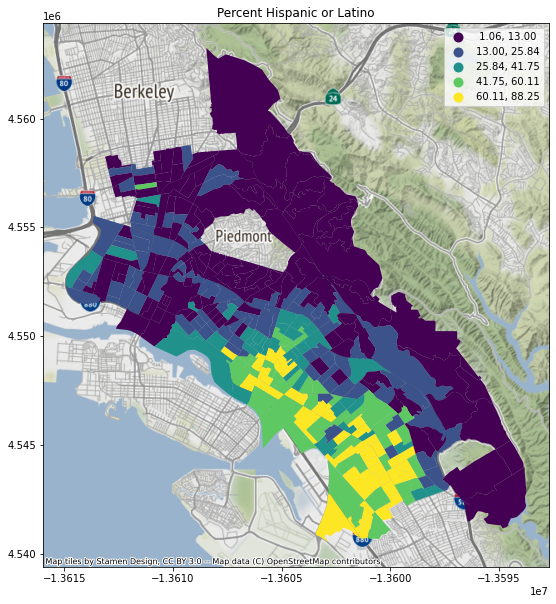

In [16]:
# List of the major racial categories
race_list = ['Percent White alone', 'Percent Black or African American alone','Percent Asian alone','Percent Hispanic or Latino']

# Function containing the mapping code
def racemap(race):
    ax = rdf_web_mercator.plot(figsize=(12,10),
                 column=race,
                 legend=True, 
                 scheme='NaturalBreaks')
    plt.title(race)
    ctx.add_basemap(ax)
    

# call the function with a loop
for race in race_list:
    racemap(race)

Ok, we have some great maps here that show in a much more detailed way the distrobution of ech racial group in the city. This will be a great visual tool for comparison against our other maps we've created.

**Next Steps**  (Updated 11/14) 

I plan to add to this notebook:

* Identify the top 10 census blocks with the largest percentage of each race 
* Save each of those top 10 lists as a separate dataframe 

In another notebook: 

* Merge the new top 10 dataframes with the time to close and pothole frequency data. 

This should be able to tell us how the areas with the highest concentration of each group are faring in occurence and resolution of potholes. 

In [19]:
rdf_web_mercator.to_file("race2019blocks.geojson", driver='GeoJSON')